In [40]:
import pandas as pd

def CreateDataFrame(filename):
    # Read in entire text file
    text_file = open(filename, "r")
    txt = text_file.read()
    text_file.close()

    # Fix some errors to properly pythonize the data in the file 
    txt = txt.replace('\n','').replace('true', 'True').replace('false', 'False').replace('NaN', 'float("NaN")').replace('null','None')

    # Multiple entries look like dictionaries concatenated. (e.g. {...}{...})
    # Split into elements and make vector like
    txt = '[' + txt.replace('}{', '},{') + ']'

    # Evaluate the "code" from the file into a nested python container and create DataFrame from it
    df = pd.DataFrame( eval(txt) )
    #print('{}  Num rows: {}  Num cols: {}'.format( filename, len(df), len(df.columns) ))
    
    return df



<AxesSubplot:>

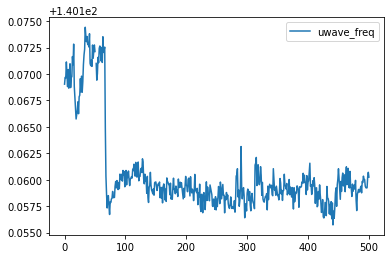

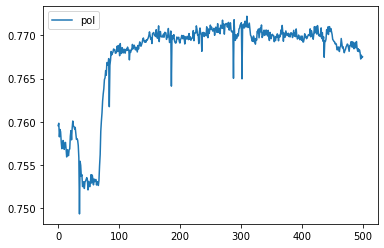

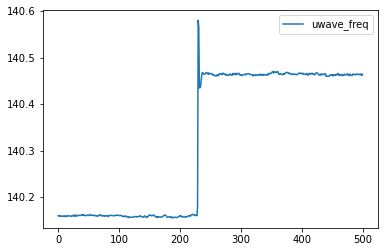

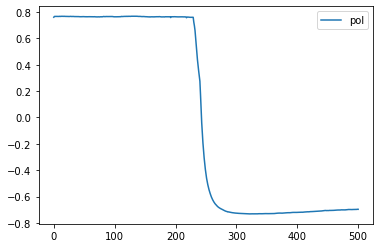

In [60]:
file = '/group/poltar/HallB/RGC/data-p/2022-09-16_21-25-21__2022-09-17_00-10-52.txt'
df = CreateDataFrame( file )
df.plot(y='uwave_freq')
df.plot(y='pol')

file = '/group/poltar/HallB/RGC/data-p/2022-09-17_00-10-52__2022-09-17_07-13-53.txt'
df = CreateDataFrame( file )
df.plot(y='uwave_freq')
df.plot(y='pol')

In [43]:
avg_pol = df['pol'].mean()
max_pol = df['pol'].min()
fom = pow(avg_pol/max_pol,2)
print('FOM: %f  Beam time saved for 44 weeks(1yr) of running: %f days' % (fom, (1-fom)*44*7))

FOM: 0.956499  Beam time saved for 44 weeks(1yr) of running: 13.398457 days


In [61]:
import glob

filenames = glob.glob('/group/poltar/HallB/RGC/data-p/2022-*__2022-*.txt')
print('Processing {} files'.format(len(filenames)))

tot_minutes = 0
tot_fom_minutes = 0

for filename in filenames:
    try:
        df = CreateDataFrame( filename )
        df = df.loc[ df['uwave_freq'] > 100 ]  # Remove rows where microwave frequency was not on
        df = df.loc[ abs(df['pol']) > 0.5 ]  # Remove rows polarization was not at least 50%
        
        if len(df) == 0:
            print('Skipping {} (no useful rows in file)'.format(filename))
            continue
        
        min_pol = df['pol'].min()
        max_pol = df['pol'].max()
        if max_pol - min_pol <1.0:  # Don't include regions were polarization was flipped
            avg_pol = df['pol'].mean()
            max = max_pol
            if abs(min_pol) > abs(max_pol) : max = min_pol
            fom = pow(avg_pol/max,2)
            print('{}  ({:3d} rows)  --  FOM: {:.3f}  Beam time saved for 40 weeks(1yr) of running: {:.1f} days'.format(filename, len(df), fom, (1-fom)*40*7))
            tot_minutes += len(df)
            tot_fom_minutes += fom*len(df)
        else:
            print('Skipping {} (polarization flip detected)'.format(filename))
    except:
        print('Skipping {} (problem parsing file)'.format(filename))

# Summary
tot_fom = tot_fom_minutes/tot_minutes
print('TOTAL  --  FOM: {:.3f}  Beam time saved base on {:.1f} hours of data for 40 weeks(1yr) of running: {:.1f} days'.format(tot_fom, tot_minutes/24, (1-tot_fom)*40*7))

Processing 378 files
Skipping /group/poltar/HallB/RGC/data-p/2022-06-19_19-37-21__2022-06-19_19-43-11.txt (no useful rows in file)
Skipping /group/poltar/HallB/RGC/data-p/2022-06-15_19-02-42__2022-06-15_19-07-01.txt (no useful rows in file)
Skipping /group/poltar/HallB/RGC/data-p/2022-06-06_21-06-25__2022-06-06_22-00-01.txt (no useful rows in file)
Skipping /group/poltar/HallB/RGC/data-p/2022-06-07_03-16-53__2022-06-07_03-17-12.txt (problem parsing file)
Skipping /group/poltar/HallB/RGC/data-p/2022-06-08_14-15-44__2022-06-08_14-17-04.txt (no useful rows in file)
/group/poltar/HallB/RGC/data-p/2022-11-04_03-48-22__2022-11-04_14-50-00.txt  (499 rows)  --  FOM: 0.993  Beam time saved for 40 weeks(1yr) of running: 2.0 days
Skipping /group/poltar/HallB/RGC/data-p/2022-07-19_15-21-22__2022-07-19_18-52-56.txt (problem parsing file)
Skipping /group/poltar/HallB/RGC/data-p/2022-06-02_15-31-53__2022-06-02_15-32-27.txt (problem parsing file)
Skipping /group/poltar/HallB/RGC/data-p/2022-06-08_14-3